# Adsorption Models - Exercise

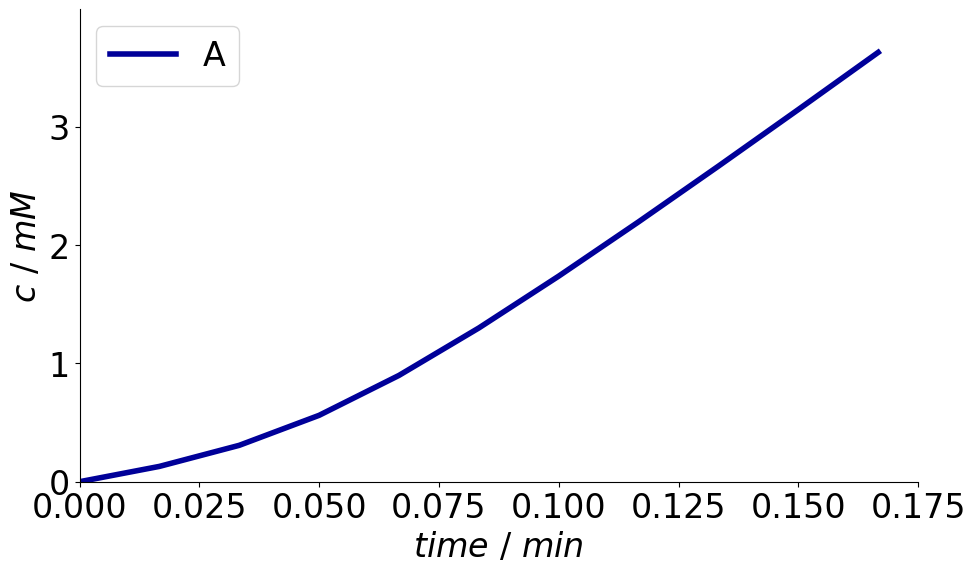

In [1]:
from CADETProcess.processModel import ComponentSystem

component_system = ComponentSystem(['A'])

from CADETProcess.processModel import Langmuir

binding_model = Langmuir(component_system, name='langmuir')
binding_model.is_kinetic = True
binding_model.adsorption_rate = [3]
binding_model.desorption_rate = [1]
binding_model.capacity = [1]

from CADETProcess.processModel import Inlet, Outlet, Cstr

reactor = Cstr(component_system, name='reactor')
reactor.porosity = 0.5
reactor.binding_model = binding_model
reactor.V = 1e-3

inlet = Inlet(component_system, name='inlet')
inlet.c = [[0,1,0,0]]
inlet.flow_rate = 1e-3

outlet = Outlet(component_system, name= 'outlet')


from CADETProcess.processModel import FlowSheet

flow_sheet = FlowSheet(component_system)

flow_sheet.add_unit(reactor)
flow_sheet.add_unit(inlet)
flow_sheet.add_unit(outlet)

flow_sheet.add_connection(inlet,reactor)
flow_sheet.add_connection(reactor,outlet)

from CADETProcess.processModel import Process

process = Process(flow_sheet, 'process')
process.cycle_time = 10

from CADETProcess.simulator import Cadet
simulator = Cadet()
sim_results = simulator.run(process)
_ = sim_results.solution.reactor.outlet.plot()



## Exercise 1: Breakthrough curve in a Column

In this example, consider a column with a `Linear` isotherm with $k_{eq, 1} = 2$, and $k_{eq, 2} = 1$.
We want to record the breakthrough curve and for this purpose, a concentration step with $c_{feed} = [1.0, 1.0]~g \cdot L^{-1} $is introduced at $t = 0$. 

***Task:*** Implement the configuration for the adsorption isotherm and pass it to the `create_column_template()` function. You also need to provide the number of can also provide

Try experimenting with:
- The binding strength.
- The number of components.
- Modify how many components bind.
- Compare kinetic binding with rapid equilibrium.

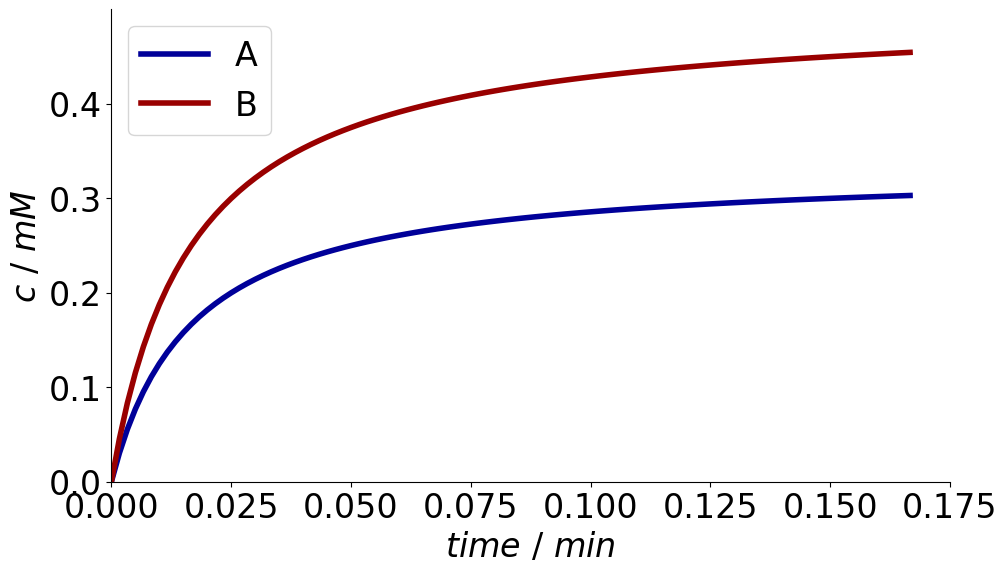

In [2]:
from CADETProcess.processModel import ComponentSystem

component_system = ComponentSystem(['A', 'B'])

from CADETProcess.processModel import Linear

binding_model = Linear(component_system, name='linear')
binding_model.is_kinetic = False
binding_model.adsorption_rate = [2, 1]
binding_model.desorption_rate = [1, 1]


from CADETProcess.processModel import Inlet, Outlet, Cstr

reactor = Cstr(component_system, name='reactor')
reactor.porosity = 0.5
reactor.binding_model = binding_model
reactor.V = 1e-3

inlet = Inlet(component_system, name='inlet')
inlet.c = [1.0, 1.0]
inlet.flow_rate = 1e-3

outlet = Outlet(component_system, name= 'outlet')


from CADETProcess.processModel import FlowSheet

flow_sheet = FlowSheet(component_system)

flow_sheet.add_unit(reactor)
flow_sheet.add_unit(inlet)
flow_sheet.add_unit(outlet)

flow_sheet.add_connection(inlet,reactor)
flow_sheet.add_connection(reactor,outlet)

from CADETProcess.processModel import Process

process = Process(flow_sheet, 'process')
process.cycle_time = 10

from CADETProcess.simulator import Cadet
simulator = Cadet()
simulator.time_resolution = 0.1

sim_results = simulator.run(process)
_ = sim_results.solution.reactor.outlet.plot()

## Exercise 2: Langmuir Model in Column

Let us consider the same experiment as in the first example, but this time with `Langmuir` adsorption model.

with $k_{eq, i} = [2, 1]$, and $q_{max, i} = [10, 10]$.
We again introduce a step with $c_{feed} = [1.0, 1.0]~g \cdot L^{-1} $is introduced at $t = 0$ and the breakthrough curve is recorded.

Try experimenting with:
- The binding strenth.
- The number of components.
- Modify how many components bind.
- Compare kinetic binding with rapid equilibrium.

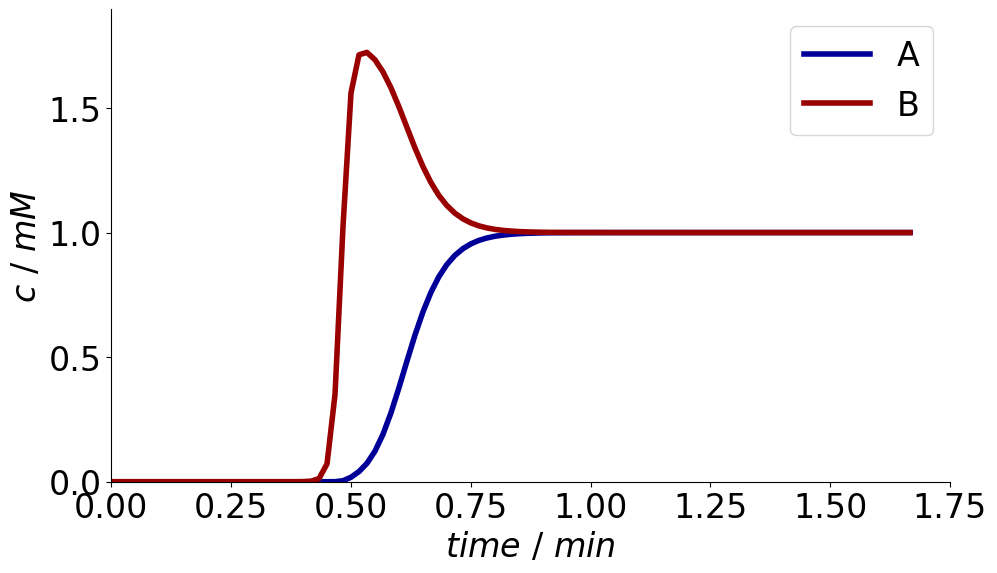

In [3]:
from CADETProcess.processModel import ComponentSystem

component_system = ComponentSystem(['A', 'B'])

from CADETProcess.processModel import Langmuir

binding_model = Langmuir(component_system, name='langmuir')
binding_model.is_kinetic = True
binding_model.adsorption_rate = [2,1]
binding_model.desorption_rate = [1,1]
binding_model.capacity = [10,10]


from CADETProcess.processModel import Inlet, Outlet, LumpedRateModelWithoutPores

reactor = LumpedRateModelWithoutPores(component_system, name='reactor')
reactor.length = 0.5
reactor.diameter = 0.1784
reactor.total_porosity = 0.5
reactor.binding_model = binding_model
reactor.axial_dispersion = 1e-7

inlet = Inlet(component_system, name='inlet')
inlet.c = [1.0, 1.0]
inlet.flow_rate = 1e-3

outlet = Outlet(component_system, name= 'outlet')


from CADETProcess.processModel import FlowSheet

flow_sheet = FlowSheet(component_system)

flow_sheet.add_unit(reactor)
flow_sheet.add_unit(inlet)
flow_sheet.add_unit(outlet)

flow_sheet.add_connection(inlet,reactor)
flow_sheet.add_connection(reactor,outlet)

from CADETProcess.processModel import Process

process = Process(flow_sheet, 'process')
process.cycle_time = 100

from CADETProcess.simulator import Cadet
simulator = Cadet()
sim_results = simulator.run(process)
_ = sim_results.solution.reactor.outlet.plot()


## Bonus Exercise

There are many other models implemented in `CADET`. 
Some binding models can account for multiple binding states, others allow for mobile phase modulators.
Moreover, binding models can use external functions for modifying the values of the parameters during the simulation.
This could be used to model other effects like temperature that have an influence on the binding strength.

Try implementing some of the more advanced isotherms and features.